# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [45]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [46]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return (x**2)*numpy.sin(x)

Ensure your function works with numpy arrays:

In [47]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [48]:
def g(x):
    '''Analytical integral of f(x).'''
    return (2*x*(numpy.sin(x)) - (x**2 - 2)*(numpy.cos(x)) - 2)

Check your solution with the same numpy array:

In [49]:
assert g(0) == 0.

In [50]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [51]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return (g(xmax) - g(xmin))

Check your analytic function:

In [52]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [53]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    h = (xmax - xmin)/(2*N)
    ans = f(xmin) - f(xmax)
    for i in range(0, N):
        ans = ans + 4 * f(xmin + (2*i + 1)*h) + 2 * f(xmin + (2*i + 2)*h)
    return (h/3) * ans

Make sure you have implemented Simpson's rule correctly:

In [54]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [55]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


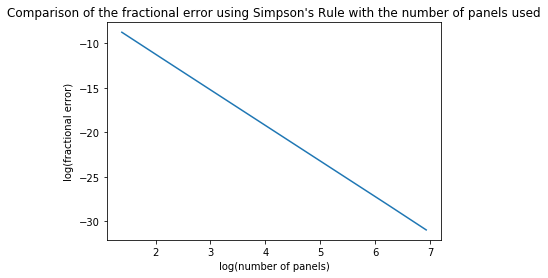

In [56]:
import math
import matplotlib.pyplot as plt
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
results_numeric = [0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(0, 9):
    results_numeric[i] = integrate_numeric(x0, x1, panel_counts[i])
fractional_errors  = [0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(0, 9):
    fractional_errors[i] = abs((results_numeric[i] - result_analytic)/result_analytic)
panel_counts_log = [0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(0, 9):
    panel_counts_log[i] = math.log(panel_counts[i])
fractional_errors_log  = [0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(0, 9):
    fractional_errors_log[i] = math.log(fractional_errors[i])
#Now we create a plot of fractional_errors_log against panel_counts_log
plt.plot(panel_counts_log, fractional_errors_log)
plt.xlabel("log(number of panels)")
plt.ylabel("log(fractional error)")
plt.title("Comparison of the fractional error using Simpson's Rule with the number of panels used")
plt.show()

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Generally, increasing number of panels N increases the accuracy because there is less extra area counted/area that isn't counted, and so the sum of the areas of the panels is closer to the correct area under the curve. If N is too large, we find a computational error where the width of each strip is extremely small, and hence so is the area of that strip. Since the computer can only hold values to a finite number of digits, then when the small areas are summed up, some precision is lost as the computer has no room to hold the very small significant figures. This produces a less accurate value at large N.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Very similarly: as N increases, the accuracy generally increases, but at extremely large N a computational error arises of summing up very small areas, and due to the device only being able to store a finite number of significant digits, some of the digits are lost. This leads to reduced accuracy at very large N.